# Building Neural Networks 3 different ways with different levels of customization

## Setup

In [7]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir('..')

print("Current working directory: ", os.getcwd())
if not os.getcwd().endswith("FashionMNIST-NN-Optimization"):
    raise ValueError("Please change working directory to 'path/FashionMNIST-NN-Optimization' before proceeding")

Current working directory:  /Users/irellzane/MLprojects/FashionMNIST-NN-Optimization


In [8]:
!pip install -r requirements.txt

ERROR: Could not find a version that satisfies the requirement keras-tuner==1.47.6 (from versions: 0.0.1.1550093565, 0.9.1, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4rc0, 1.0.4rc1, 1.0.4, 1.1.0rc0, 1.1.0, 1.1.1rc0, 1.1.1, 1.1.2rc0, 1.1.2, 1.1.3rc0, 1.1.3, 1.2.0rc0, 1.2.0, 1.2.1, 1.3.0, 1.3.1, 1.3.2, 1.3.3, 1.3.4, 1.3.5, 1.4.0rc0, 1.4.0, 1.4.1, 1.4.2, 1.4.3, 1.4.4, 1.4.5, 1.4.6, 1.4.7)
ERROR: No matching distribution found for keras-tuner==1.47.6


In [357]:
import zipfile
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras_tuner as kt

## Fetch data

In [358]:
with zipfile.ZipFile("data/fashion_mnist_data.zip", 'r') as zip_ref:
    zip_ref.extractall("data/")

In [359]:
fmnist_train = pd.read_csv("data/fashion_mnist_train.csv")
fmnist_test = pd.read_csv("data/fashion_mnist_test.csv")

## Separating labels and data splitting

In [360]:
fmnist_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [361]:
fmnist_train.notnull().any(axis=1).value_counts()

True    60000
Name: count, dtype: int64

In [362]:
y_train_valid = fmnist_train["label"]
X_train_valid = fmnist_train.drop("label", axis=1)
y_test = fmnist_test["label"]
X_test = fmnist_test.drop("label", axis=1)

In [363]:
len(X_train_valid)

60000

In [364]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=1/12, stratify=y_train_valid)

In [365]:
len(X_train), len(X_valid)

(55000, 5000)

In [366]:
y_train.value_counts()

label
9    5500
6    5500
4    5500
5    5500
2    5500
0    5500
7    5500
8    5500
1    5500
3    5500
Name: count, dtype: int64

In [367]:
fmnist_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [368]:
labels = np.array(["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"])

## Scaling data

In [369]:
X_train /= 255
X_valid /= 255
X_test /= 255

## Dataset analysis

In [370]:
X_train.shape

(55000, 784)

In [371]:
input_shape = X_train.shape[1]
img_len = int(np.sqrt(input_shape))

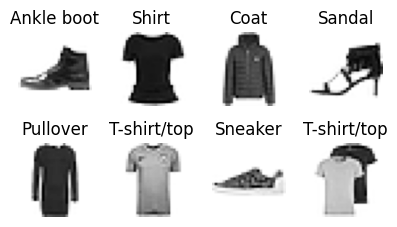

In [372]:
n_rows = 2
n_cols = 4
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        image = X_train.iloc[index].to_numpy().reshape(img_len, img_len)
        plt.imshow(image, cmap="Greys")
        plt.axis('off')
        plt.title(labels[y_train.iloc[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Sequential API

In [399]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(input_shape, )),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [374]:
X_train.shape

(55000, 784)

## Model analysis

In [375]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

In [376]:
model.layers

[<Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [377]:
dense = model.get_layer("dense")
weights, biases = dense.get_weights()

weights

array([[-1.8063180e-02, -2.1914542e-02,  4.1271076e-02, ...,
         5.8402643e-03,  6.3633144e-02,  4.0702343e-02],
       [-1.7620191e-02, -5.9774674e-02, -5.2228779e-02, ...,
        -6.9058001e-02, -4.5843776e-02,  6.3592628e-02],
       [ 1.8644825e-02, -7.3180951e-02,  6.5976992e-02, ...,
        -5.2874163e-03, -2.8433427e-03,  7.9962507e-02],
       ...,
       [ 7.8662708e-02, -7.7715568e-02,  1.3739526e-02, ...,
        -4.2070732e-02, -5.2544981e-02,  5.4562092e-04],
       [-7.0429005e-02, -8.4551126e-03, -8.0231495e-02, ...,
        -3.2048330e-02,  3.9964952e-02,  5.2742660e-05],
       [-7.7302076e-02,  9.9100918e-04, -5.5312604e-02, ...,
         7.9426438e-02, -4.8840605e-02,  9.2681497e-04]], dtype=float32)

In [378]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

## Training the model

In [400]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [401]:
n_epochs = 30

history = model.fit(X_train, y_train, epochs=n_epochs, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 500us/step - accuracy: 0.6422 - loss: 1.0954 - val_accuracy: 0.8096 - val_loss: 0.5440
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 426us/step - accuracy: 0.8183 - loss: 0.5308 - val_accuracy: 0.8292 - val_loss: 0.4789
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 442us/step - accuracy: 0.8362 - loss: 0.4734 - val_accuracy: 0.8420 - val_loss: 0.4480
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 429us/step - accuracy: 0.8460 - loss: 0.4424 - val_accuracy: 0.8478 - val_loss: 0.4272
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 627us/step - accuracy: 0.8538 - loss: 0.4201 - val_accuracy: 0.8536 - val_loss: 0.4111
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 448us/step - accuracy: 0.8596 - loss: 0.4028 - val_accuracy: 0.8582 - val_loss: 0.3997
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 459us/step - accuracy: 0.8644 - loss: 0.3888 - val_accuracy: 0.8610 - val_loss: 0.3897
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 467us/step - accuracy: 0.8670 -

In [418]:
history = pd.DataFrame(history.history)
history.head()

,accuracy,loss,val_accuracy,val_loss
0,0.740982,0.778568,0.8096,0.543991
1,0.822909,0.512642,0.8292,0.478863
2,0.838509,0.464912,0.8420,0.448031
3,0.847527,0.436908,0.8478,0.427218
4,0.854800,0.416359,0.8536,0.411117


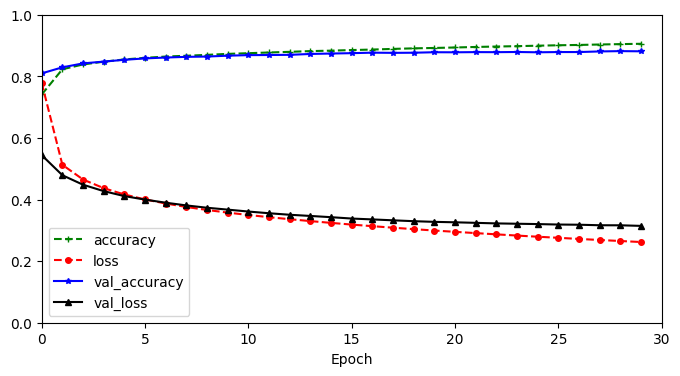

In [420]:
history.plot(figsize=(8, 4), xlim=[0, n_epochs], ylim=[0, 1], xlabel="Epoch", style=["g+--", "ro--", "b*-", "k^-"], markersize=4)
plt.show()

In [ ]:
model.evaluate(X_valid, y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - accuracy: 0.8812 - loss: 0.3184


[0.31442543864250183, 0.8812000155448914]

In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - accuracy: 0.8834 - loss: 0.3187


[0.31283968687057495, 0.8870999813079834]

In [ ]:
model.save("models/sequential_model.keras")

## Creating a more dynamic model with keras functional api

In [434]:
tf.random.set_seed(42)

input_wide = tf.keras.layers.Input(shape=[input_shape])
input_deep = tf.keras.layers.Input(shape=[input_shape])
hidden1 = tf.keras.layers.Dense(100, activation="relu")(input_deep)
hidden2 = tf.keras.layers.Dense(100, activation="relu")(hidden1)
hidden3 = tf.keras.layers.Dense(100, activation="relu")(hidden2)
hidden4 = tf.keras.layers.Dense(100, activation="relu")(hidden3)
concat = tf.keras.layers.Concatenate()([input_wide, hidden4])
output = tf.keras.layers.Dense(10, activation="softmax")(concat)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [435]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [436]:
history = model.fit((X_train, X_train), y_train, epochs=30, validation_data=((X_valid, X_valid), y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6602 - loss: 1.0809 - val_accuracy: 0.7958 - val_loss: 0.6195
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 913us/step - accuracy: 0.8059 - loss: 0.5897 - val_accuracy: 0.8214 - val_loss: 0.5260
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 888us/step - accuracy: 0.8263 - loss: 0.5105 - val_accuracy: 0.8330 - val_loss: 0.4816
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 936us/step - accuracy: 0.8362 - loss: 0.4710 - val_accuracy: 0.8412 - val_loss: 0.4542
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 876us/step - accuracy: 0.8444 - loss: 0.4450 - val_accuracy: 0.8498 - val_loss: 0.4333
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 879us/step - accuracy: 0.8509 - loss: 0.4244 - val_accuracy: 0.8530 - val_loss: 0.4164
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8576 - loss: 0.4073 - val_accuracy: 0.8596 - val_loss: 0.4034
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 917us/step - accuracy: 0.8619 - los

In [438]:
model.evaluate((X_valid, X_valid), y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.8885 - loss: 0.3193


[0.3120221197605133, 0.8894000053405762]

In [440]:
model.evaluate((X_test, X_test), y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.8842 - loss: 0.3229


[0.32136088609695435, 0.8858000040054321]

In [469]:
model.save("models/func_api_model.keras")

## Build a more dynamic model with the Subclassing API

In [459]:
class DynamicModel(tf.keras.Model):
    def __init__(self, n_hidden_layers=2):
        super().__init__()
        self.hidden_layers = [tf.keras.layers.Dense(100, activation="relu", input_shape=(784, ))]
        
        for _ in range(1, n_hidden_layers):
            self.hidden_layers.append(tf.keras.layers.Dense(100, activation="relu"))
        
        self.output_layer = tf.keras.layers.Dense(10, activation="softmax")
    
    def call(self, inputs):
        x = inputs
        for hidden_layer in self.hidden_layers:
            x = hidden_layer(x)

        x = self.output_layer(x)
        return x

In [460]:
model = DynamicModel(n_hidden_layers=4)

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

/Users/irellzane/MLprojects/FashionMNIST-NN-Optimization/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [461]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 899us/step - accuracy: 0.7520 - loss: 0.6923 - val_accuracy: 0.8546 - val_loss: 0.3953
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 783us/step - accuracy: 0.8555 - loss: 0.3954 - val_accuracy: 0.8676 - val_loss: 0.3563
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 773us/step - accuracy: 0.8704 - loss: 0.3533 - val_accuracy: 0.8732 - val_loss: 0.3401
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 872us/step - accuracy: 0.8811 - loss: 0.3261 - val_accuracy: 0.8770 - val_loss: 0.3214
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 785us/step - accuracy: 0.8888 - loss: 0.3066 - val_accuracy: 0.8788 - val_loss: 0.3253
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 819us/step - accuracy: 0.8934 - loss: 0.2908 - val_accuracy: 0.8810 - val_loss: 0.3156
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 824us/step - accuracy: 0.8977 - loss: 0.2750 - val_accuracy: 0.8766 - val_loss: 0.3278
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 771us/step - accuracy: 0.9018 -

In [467]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - accuracy: 0.8844 - loss: 0.3871


[0.4014827609062195, 0.8880000114440918]

In [466]:
model.save("models/subclass_model.keras")